In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import matplotlib.pyplot as plt #Plotting diagrams
import seaborn as sns #Plotting diagrams
%matplotlib inline 
#Te quitas errores al usar plt o sns

In [3]:
dtrain = pd.read_csv("/kaggle/input/titanic/train.csv") #This is the training set
dtest = pd.read_csv("/kaggle/input/titanic/test.csv") #This is the test set
dgender = pd.read_csv("/kaggle/input/titanic/gender_submission.csv") #THIS IS THE OUTPUTS OF THE TEST SET


In [4]:
Pclass = dtrain["Pclass"] #Passenger Class
Sex = dtrain["Sex"]
Age = dtrain["Age"]
SibSp = dtrain["SibSp"] #Number of siblings / spouses aboard the Titanic
Parch = dtrain["Parch"] #Number of parents / children aboard the Titanic	
Cabin = dtrain["Cabin"] 
Embarked = dtrain["Embarked"] #Port of embarkment


In [5]:
dtrain['train_test'] = 1 #ADDS column 'train_test' with 1's.
dtest['train_test'] = 0 #ADDS column 'train_test' with 0's.
dtest['Survived'] = np.NaN #ADDS column 'Survived' with NaN object.
all_data = pd.concat([dtrain,dtest]) #Joins both dataframes 
print(all_data)

     PassengerId  Survived  Pclass  \
0              1       0.0       3   
1              2       1.0       1   
2              3       1.0       3   
3              4       1.0       1   
4              5       0.0       3   
..           ...       ...     ...   
413         1305       NaN       3   
414         1306       NaN       1   
415         1307       NaN       3   
416         1308       NaN       3   
417         1309       NaN       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

 **Let's first analyse the data**

In [6]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  train_test   1309 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 143.2+ KB


In [7]:
all_data.describe()
# to better understand the numeric data, 
# we want to use the .describe() method. This gives us 
# an understanding of the central tendencies of the data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479,0.680672
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668,0.466394
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


In [8]:
# look at numeric and categorical values separately 
df_num = all_data[['Age','SibSp','Parch','Fare']]
df_cat = all_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

# We now analyse the categorical features

In [9]:
print("PRIMERO VEMOS ESTO ")
print(df_cat['Pclass'].value_counts()) #Esto es un Series object

#This is just to show what 
# the code bellow is doing
print( "AHORA ESTO:")
print(df_cat['Pclass'].value_counts().index) #Esto es casi como un array

PRIMERO VEMOS ESTO 
3    709
1    323
2    277
Name: Pclass, dtype: int64
AHORA ESTO:
Int64Index([3, 1, 2], dtype='int64')


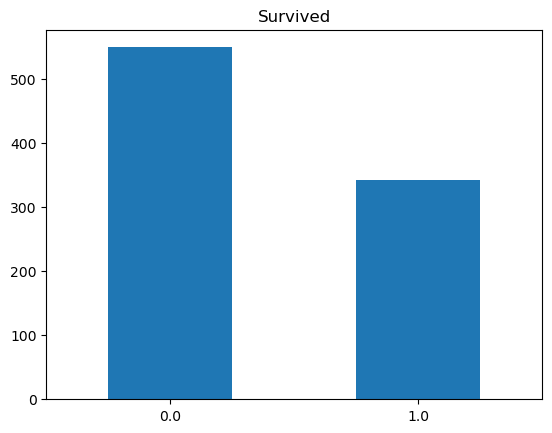

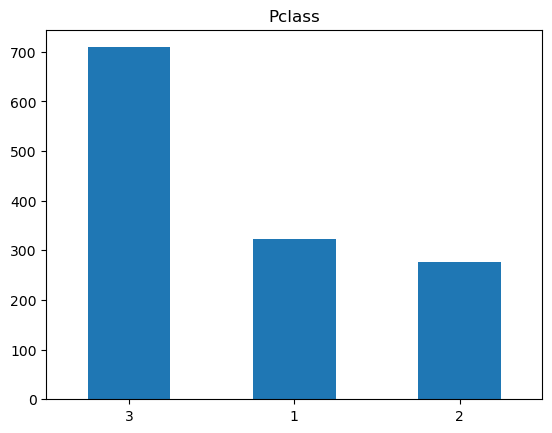

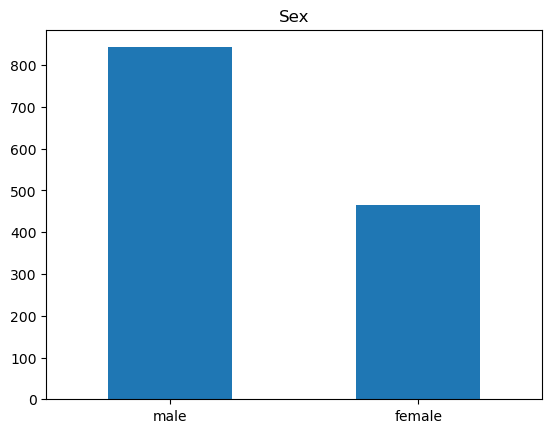

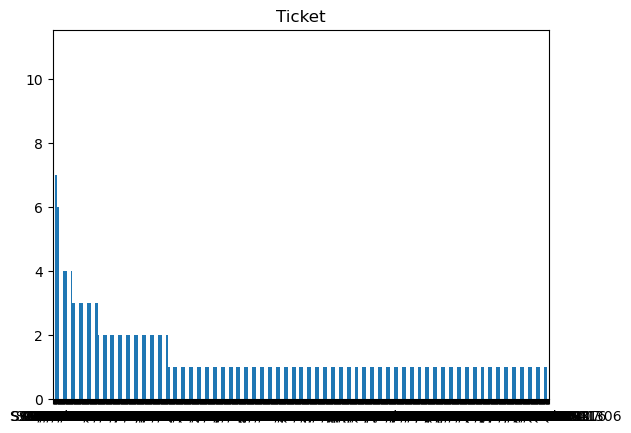

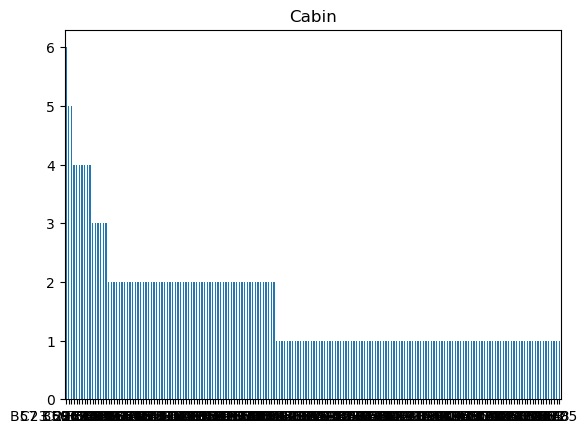

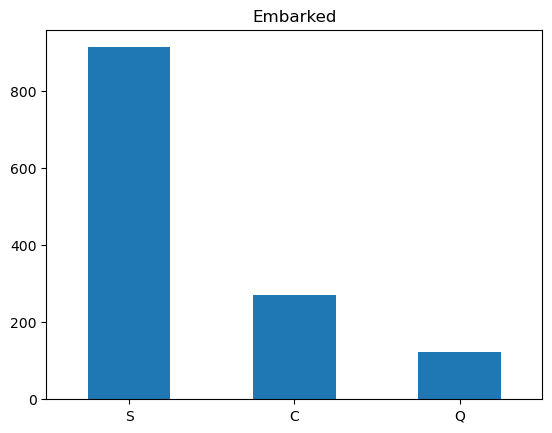

In [10]:
for i in df_cat.columns: #Choosing only the categorical data
    df_cat[i].value_counts().plot(kind='bar',rot =0)
    plt.title(i)
    plt.show()


Note there is loads of Cabin and Ticket features, so we might want to do some feature engineering

Maybe Cabin's closer to each other tended to either survive or not.

Person's title relate to survival rates??

In [11]:
#Vamos a ver que tipo de tickets hay
print(all_data['Ticket'].value_counts())

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64


There's more tickets than ticket numbers so maybe tickets booked together have the same number. Meaning we can tell if individuals were travelling acompanied or not (we can also tell this from Parch and SibSp, but this also includes non-family members). 

In [12]:
all_data['Ticket_group_size'] = all_data.groupby('Ticket')['Ticket'].transform('count')
print(all_data['Ticket_group_size'])

0      1
1      2
2      1
3      2
4      1
      ..
413    1
414    3
415    1
416    1
417    3
Name: Ticket_group_size, Length: 1309, dtype: int64


Above we can see the number of persons that had the same ticket for each individual.

In [13]:
#Vamos a ver que tipo de cabins hay
print(all_data['Cabin'].head(5))
print(all_data['Cabin'].head(-885))
print(all_data['Cabin'].value_counts().head(-120))

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object
0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
419     NaN
420     NaN
421     NaN
422     NaN
423     NaN
Name: Cabin, Length: 424, dtype: object
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
C22 C26            4
F33                4
                  ..
D26                2
D10 D12            2
F G73              2
D36                2
C83                2
Name: Cabin, Length: 66, dtype: int64


In [14]:
#Now im going to check if even or odd cabins were more prone to surviving
def check_parity_cabins(x):
    if pd.isna(x)==True: #-1 para los que no se sabe numero
        return np.nan
    elif len(x.split(' '))>1: #Algunos tienen varias cabinas(asi que miramos su primera)
        y = x.split(' ')[0][1:]
        if y.isnumeric()==False: #Miramos la segunda en caso que la primera no tenga numero
            z = x.split(' ')[1][1:]
            if int(z)%2==0:
                return 'even'
            else:
                return 'odd'
        elif int(y)%2==0:
            return 'even'
        else:
            return 'odd'
    elif x[1:].isnumeric()== True and int(x[1:])%2 == 0:
        return 'even'
    elif x.split(' ')[0][1:].isnumeric()==False:
        return np.nan
    else:
        return 'odd'
        
all_data['Cabin_last_digit'] = all_data.Cabin.apply(check_parity_cabins)
print(pd.pivot_table(all_data, index = 'Survived', columns = 'Cabin_last_digit', values = 'Ticket' ,aggfunc ='count'))
print()

Cabin_last_digit  even  odd
Survived                   
0.0                 42   24
1.0                 66   68



Even numbered cabins had less survival rate.

Let's now see the cabin letters

In [15]:
#creates categories based on the cabin letter (n stands for null)
#in this case we will treat null values like it's own category

all_data['cabin_letter'] = all_data.Cabin.apply(lambda x: "letter " + str(x)[0])


In [16]:
#comparing surivial rate by cabin
print(all_data.cabin_letter.value_counts())
pd.pivot_table(all_data,index='Survived',columns='cabin_letter', values = 'Ticket', aggfunc='count')

letter n    1014
letter C      94
letter B      65
letter D      46
letter E      41
letter A      22
letter F      21
letter G       5
letter T       1
Name: cabin_letter, dtype: int64


cabin_letter,letter A,letter B,letter C,letter D,letter E,letter F,letter G,letter T,letter n
Survived,,,,,,,,,
0.0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1.0,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


Maybe B, D y E have higher survival rates

In [17]:
#Selecting the title a person had 
all_data.Name.head(50)
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
print(all_data['name_title'].value_counts())
#mr., ms., master. etc

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: name_title, dtype: int64


Looks like Mr, Miss, Mrs and Master are the most popular. 

Although Mlle is French for Miss (unmarried) and Mme is French for Mrs. Hence we are going to group these. Ms is also another way of saying Miss.

In order to reduce time computation due to too many features we are also going to group the least common features into an LeastCommontitles group.


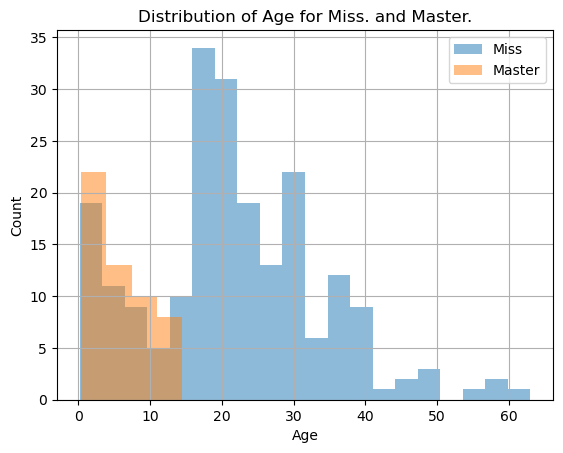

In [18]:
all_data[all_data['name_title']=='Miss']['Age'].dropna().hist(alpha=0.5, bins=20, label='Miss')
all_data[all_data['name_title']=='Master']['Age'].dropna().hist(alpha=0.5, bins=4, label='Master')

plt.title('Distribution of Age for Miss. and Master.')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

As we can see from the plot above, Master is used for men under the age of 18.


In [19]:
# Recategorize uncommon titles that fit into "Miss." and "Mrs."
all_data.loc[all_data['name_title'].isin(['Ms', 'Mlle']), 'name_title'] = 'Miss'
all_data.loc[all_data['name_title'].isin(['Mme']), 'name_title'] = 'Mrs'

# Create new title 'Uncommon'
LeastCommontitles = ['Major', 'Lady', 'Sir', 'Don', 'Capt', 'Countess', 'Jonkheer', 'Dona', 'Dr', 'Rev', 'Col', 'the Countess']
all_data.loc[all_data['name_title'].isin(LeastCommontitles), 'name_title'] = 'Uncommon'

# Display count of each title 
display(all_data['name_title'].value_counts())

Mr          757
Miss        264
Mrs         198
Master       61
Uncommon     29
Name: name_title, dtype: int64

In [20]:
# Comparing survival and each of these categorical variables 
print(pd.pivot_table(all_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(all_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(all_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0.0        80  97  372
1.0       136  87  119

Sex       female  male
Survived              
0.0           81   468
1.0          233   109

Embarked   C   Q    S
Survived             
0.0       75  47  427
1.0       93  30  217


**Now I am going to perform ONE HOT ENCODING on categorical data**

In [21]:
print(all_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'Ticket_group_size', 'Cabin_last_digit', 'cabin_letter', 'name_title'],
      dtype='object')


In [22]:
all_data.Pclass = all_data.Pclass.astype(str) #The data in passenger class is numeric but I want it in object type do that hstack works

**We are going to be using all the data as one hot, so we do all the above to all_data (not just dtrain)**

In [23]:
ohe = OneHotEncoder()
onehottrain = ohe.fit_transform(all_data[['Pclass', 'Sex', 'name_title', 'Cabin_last_digit', 'Embarked', 'cabin_letter']]).toarray()
#fit_transform first encodes(fits) data and then transforms it from OneHotEncoder type to list
features_labels = ohe.categories_ #This is an array of arrays
print(features_labels)
features_labels1 = np.hstack(features_labels)#This is an array of objects


[array(['1', '2', '3'], dtype=object), array(['female', 'male'], dtype=object), array(['Master', 'Miss', 'Mr', 'Mrs', 'Uncommon'], dtype=object), array(['even', 'odd', nan], dtype=object), array(['C', 'Q', 'S', nan], dtype=object), array(['letter A', 'letter B', 'letter C', 'letter D', 'letter E',
       'letter F', 'letter G', 'letter T', 'letter n'], dtype=object)]


Here we have the categorical features in one hot data form

In [24]:
onehotfeatures = pd.DataFrame(np.array(onehottrain), columns= features_labels1)
print(onehotfeatures)

        1    2    3  female  male  Master  Miss   Mr  Mrs  Uncommon  ...  NaN  \
0     0.0  0.0  1.0     0.0   1.0     0.0   0.0  1.0  0.0       0.0  ...  0.0   
1     1.0  0.0  0.0     1.0   0.0     0.0   0.0  0.0  1.0       0.0  ...  0.0   
2     0.0  0.0  1.0     1.0   0.0     0.0   1.0  0.0  0.0       0.0  ...  0.0   
3     1.0  0.0  0.0     1.0   0.0     0.0   0.0  0.0  1.0       0.0  ...  0.0   
4     0.0  0.0  1.0     0.0   1.0     0.0   0.0  1.0  0.0       0.0  ...  0.0   
...   ...  ...  ...     ...   ...     ...   ...  ...  ...       ...  ...  ...   
1304  0.0  0.0  1.0     0.0   1.0     0.0   0.0  1.0  0.0       0.0  ...  0.0   
1305  1.0  0.0  0.0     1.0   0.0     0.0   0.0  0.0  0.0       1.0  ...  0.0   
1306  0.0  0.0  1.0     0.0   1.0     0.0   0.0  1.0  0.0       0.0  ...  0.0   
1307  0.0  0.0  1.0     0.0   1.0     0.0   0.0  1.0  0.0       0.0  ...  0.0   
1308  0.0  0.0  1.0     0.0   1.0     1.0   0.0  0.0  0.0       0.0  ...  0.0   

      letter A  letter B  l

Note the Nan columns are not very informative so we should drop them

In [25]:
onehotfeatures = onehotfeatures[onehotfeatures.columns.dropna()]
onehotfeatures

,1,2,3,female,male,Master,Miss,Mr,Mrs,Uncommon,...,S,letter A,letter B,letter C,letter D,letter E,letter F,letter G,letter T,letter n
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1305,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1306,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1307,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Now we look at the numeric data

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


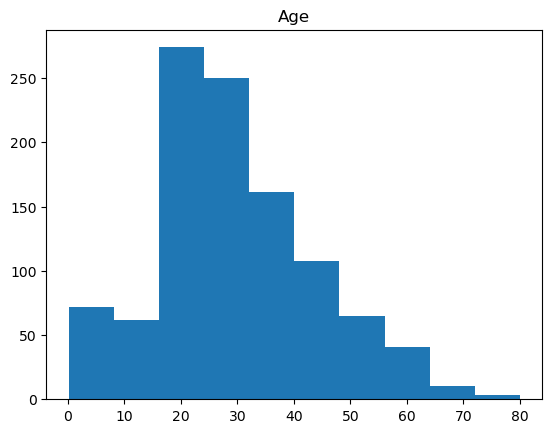

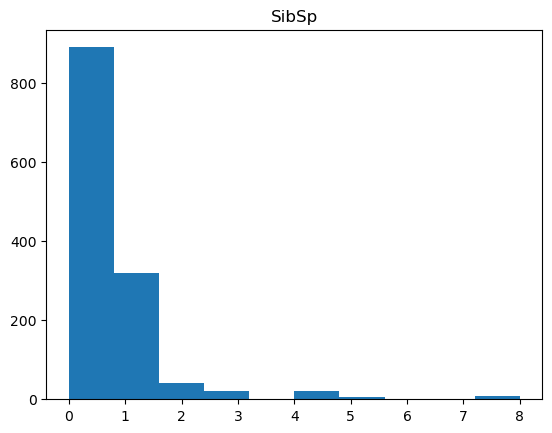

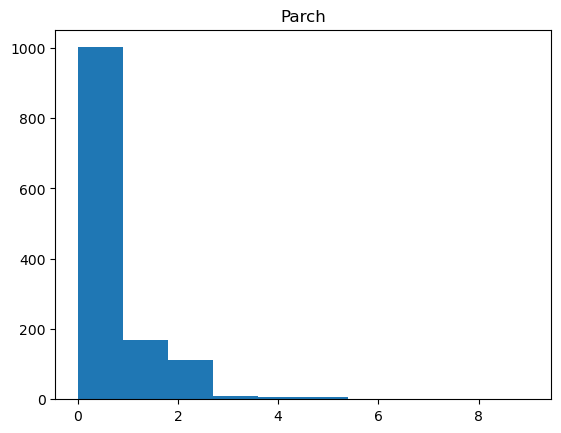

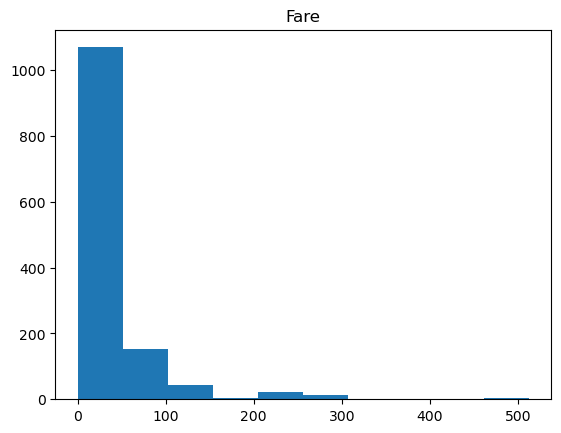

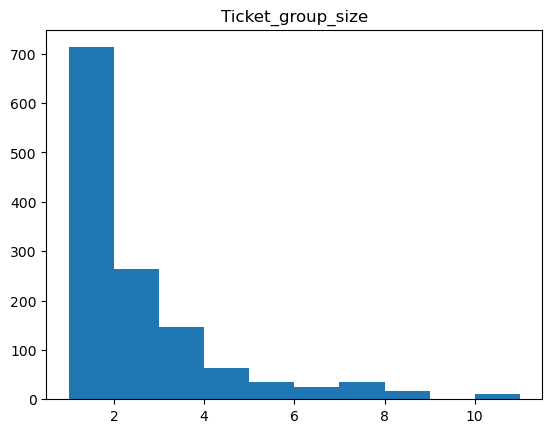

In [26]:
#distributions for all numeric variables 
df_num['Ticket_group_size'] = all_data['Ticket_group_size']
for i in df_num.columns:
    plt.hist(all_data[i])
    plt.title(i)
    plt.show()

It looks like the distributions of Sbsp, Parch and Fair should be normalized. Also the range of age is 0-80, SibSp: 0-8, Parch: 0-6, Fare: 0-512. So maybe the ranges are too different. Hence Fare and Age will influence more the model due to higher values.

In [27]:
print(df_num.corr()) #This gives the correlation values 

                        Age     SibSp     Parch      Fare  Ticket_group_size
Age                1.000000 -0.243699 -0.150917  0.178740          -0.185284
SibSp             -0.243699  1.000000  0.373587  0.160238           0.679444
Parch             -0.150917  0.373587  1.000000  0.221539           0.647029
Fare               0.178740  0.160238  0.221539  1.000000           0.478940
Ticket_group_size -0.185284  0.679444  0.647029  0.478940           1.000000


Note that Ticket_group_size is highly correlated with SibSp, Parch and Fare. This should be expected, however we might want to perform some further feature engineering so that these features don't affect to much the model. 

There are outliers in Fare, this may be due to some tickets being bought in groups. To get rid of these outliers, lets create a Fair per passenger feature.

In [28]:
all_data['Fare_per_passenger'] = all_data['Fare'] / all_data['Ticket_group_size']

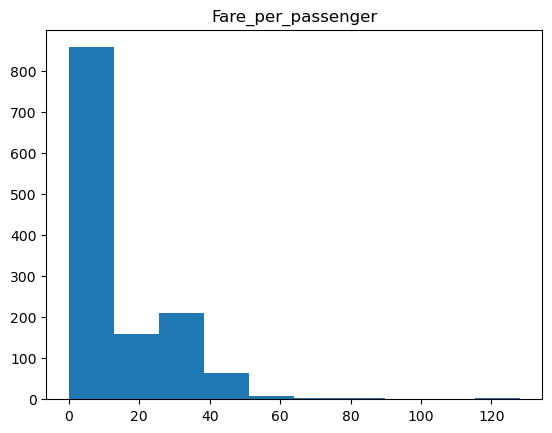

In [29]:
plt.hist(all_data['Fare_per_passenger'])
plt.title('Fare_per_passenger')
plt.show()

Seems like we have gotten rid of the outliers

In [30]:
# get the average Age, SibSp, Parch, and Fare for survivals and non-survivals
pd.pivot_table(all_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare_per_passenger'])

,Age,Fare_per_passenger,Parch,SibSp
Survived,,,,
0.0,30.626179,11.463456,0.329690,0.553734
1.0,28.343690,19.507553,0.464912,0.473684


We now want to normalize SibSp, Parch and Fair. But first let's fill in the Nulls with median or mean.

In [31]:
 #To check if the is Nan values in column
print(all_data.Age.isna().any())
print(all_data.Ticket_group_size.isna().any())
print(all_data.Fare_per_passenger.isna().any())
print(all_data.Parch.isna().any())
print(all_data.SibSp.isna().any())

True
False
True
False
False


Both age and fair per passenger should have some Nan values replaced. Since Age has Gaussian-like distribution we can use the mean. Fare has a skewed distribution so we should replace with median (outliers affect more the mean).

In [32]:
all_data.Age = all_data.Age.fillna(all_data.Age.mean())
all_data.Fare_per_passenger = all_data.Fare_per_passenger.fillna(all_data.Fare_per_passenger.median())

Now we log normalize the Fare, SibSp and Parch

<AxesSubplot:>

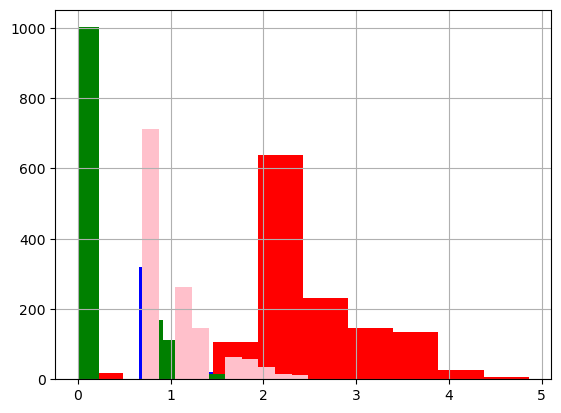

In [33]:
all_data['norm_sibsp'] = np.log(all_data.SibSp+1)
all_data['norm_sibsp'].hist(color = 'blue')

all_data['norm_fare_per_passenger'] = np.log(all_data.Fare_per_passenger+1)
all_data['norm_fare_per_passenger'].hist(color = 'red')

all_data['norm_parch'] = np.log(all_data.Parch+1)
all_data['norm_parch'].hist(color = 'green')

all_data['norm_ticketgroup'] = np.log(all_data.Ticket_group_size+1)
all_data['norm_ticketgroup'].hist(color = 'pink')


We can see that the fare has been kind of normalized, therefore the orginal fare was log normal distributed. SibSp and Parch dont seem to be log normally distributed.

# Age featuring

I first took age as a numeric variable. However it makes sense that children survived more than adults. Let's divide the age into 4 catgories 0-20, 21-40, 41-60,61+.

In [34]:
all_data['Age1'] = all_data.Age.apply(lambda x: 1 if x<= 20 else 0)
all_data['Age2'] = all_data.Age.apply(lambda x: 1 if x> 20 and x<=40 else 0)
all_data['Age3'] = all_data.Age.apply(lambda x: 1 if x>40 and x<= 60 else 0)
all_data['Age4'] = all_data.Age.apply(lambda x: 1 if x>60 else 0)

In [35]:
#Create DataFrames with only individuals of each age category
Age1df = all_data[all_data.Age1==1]
Age2df = all_data[all_data.Age2==1]
Age3df = all_data[all_data.Age3==1]
Age4df = all_data[all_data.Age4==1]
print('Age1 rates: ', Age1df['Survived'].value_counts(normalize = True))
print()
print('Age2 rates: ', Age2df['Survived'].value_counts(normalize = True))
print()
print('Age3 rates: ', Age3df['Survived'].value_counts(normalize = True))
print()
print('Age4 rates: ', Age4df['Survived'].value_counts(normalize = True))

Age1 rates:  0.0    0.541899
1.0    0.458101
Name: Survived, dtype: float64

Age2 rates:  0.0    0.635231
1.0    0.364769
Name: Survived, dtype: float64

Age3 rates:  0.0    0.609375
1.0    0.390625
Name: Survived, dtype: float64

Age4 rates:  0.0    0.772727
1.0    0.227273
Name: Survived, dtype: float64


Clearly Age1 survived the most, Age2 and Age3 are similar and Age4 survived the least.

# Preparing training data and test data

We now have all the data as we want it.

In [36]:
print(onehotfeatures.columns)
print(all_data.columns)

Index(['1', '2', '3', 'female', 'male', 'Master', 'Miss', 'Mr', 'Mrs',
       'Uncommon', 'even', 'odd', 'C', 'Q', 'S', 'letter A', 'letter B',
       'letter C', 'letter D', 'letter E', 'letter F', 'letter G', 'letter T',
       'letter n'],
      dtype='object')
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test',
       'Ticket_group_size', 'Cabin_last_digit', 'cabin_letter', 'name_title',
       'Fare_per_passenger', 'norm_sibsp', 'norm_fare_per_passenger',
       'norm_parch', 'norm_ticketgroup', 'Age1', 'Age2', 'Age3', 'Age4'],
      dtype='object')


Let's drop the columns we don't want any more (due to feature engineering or one hot encoding)

In [37]:
all_data0 = all_data.drop(['PassengerId', 'Pclass', 'Name', 'Sex', 'norm_sibsp', 'norm_parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_letter', 'name_title', 'Cabin_last_digit', 'norm_ticketgroup', 'norm_fare_per_passenger', 'Age'], axis=1)
print(all_data0.columns)

Index(['Survived', 'SibSp', 'Parch', 'train_test', 'Ticket_group_size',
       'Fare_per_passenger', 'Age1', 'Age2', 'Age3', 'Age4'],
      dtype='object')


In [38]:
all_data1 = all_data0.reset_index() #This removes an indexing error by cretaing an index column, we will later remove this column to prevent overfitting
print(all_data1.columns)
all_data2 = pd.concat([onehotfeatures, all_data1], axis=1)

all_data2 = all_data2.drop(['index'], axis = 1)
all_data2.columns

Index(['index', 'Survived', 'SibSp', 'Parch', 'train_test',
       'Ticket_group_size', 'Fare_per_passenger', 'Age1', 'Age2', 'Age3',
       'Age4'],
      dtype='object')


Index(['1', '2', '3', 'female', 'male', 'Master', 'Miss', 'Mr', 'Mrs',
       'Uncommon', 'even', 'odd', 'C', 'Q', 'S', 'letter A', 'letter B',
       'letter C', 'letter D', 'letter E', 'letter F', 'letter G', 'letter T',
       'letter n', 'Survived', 'SibSp', 'Parch', 'train_test',
       'Ticket_group_size', 'Fare_per_passenger', 'Age1', 'Age2', 'Age3',
       'Age4'],
      dtype='object')

Note that passengers are either male or female(no NaN values, I checked). So we can drop for example the male column.

In [39]:
all_data2 = all_data2.drop(['male'], axis = 1)

In [40]:
#Split to train test again
X_train = all_data2[all_data2.train_test == 1].drop(['train_test', 'Survived'], axis =1)
X_test = all_data2[all_data2.train_test == 0].drop(['train_test', 'Survived'], axis =1)


y_train = all_data2[all_data2.train_test==1].Survived
y_train.shape

(891,)

Now we scale data

In [41]:
# Scale data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
all_data_scaled = all_data2.copy()
all_data_scaled[['SibSp','Parch','Fare_per_passenger']]= scale.fit_transform(all_data_scaled[['SibSp','Parch','Fare_per_passenger']])


X_train_scaled = all_data_scaled[all_data_scaled.train_test == 1].drop(['train_test','Survived'], axis =1)
X_test_scaled = all_data_scaled[all_data_scaled.train_test == 0].drop(['train_test', 'Survived'], axis =1)

y_train = all_data2[all_data2.train_test==1].Survived


In [42]:
print(y_train)

0      0.0
1      1.0
2      1.0
3      1.0
4      0.0
      ... 
886    0.0
887    1.0
888    0.0
889    1.0
890    0.0
Name: Survived, Length: 891, dtype: float64


In [43]:
print(X_train_scaled)
print(all_data_scaled)

       1    2    3  female  Master  Miss   Mr  Mrs  Uncommon  even  ...  \
0    0.0  0.0  1.0     0.0     0.0   0.0  1.0  0.0       0.0   0.0  ...   
1    1.0  0.0  0.0     1.0     0.0   0.0  0.0  1.0       0.0   0.0  ...   
2    0.0  0.0  1.0     1.0     0.0   1.0  0.0  0.0       0.0   0.0  ...   
3    1.0  0.0  0.0     1.0     0.0   0.0  0.0  1.0       0.0   0.0  ...   
4    0.0  0.0  1.0     0.0     0.0   0.0  1.0  0.0       0.0   0.0  ...   
..   ...  ...  ...     ...     ...   ...  ...  ...       ...   ...  ...   
886  0.0  1.0  0.0     0.0     0.0   0.0  0.0  0.0       1.0   0.0  ...   
887  1.0  0.0  0.0     1.0     0.0   1.0  0.0  0.0       0.0   1.0  ...   
888  0.0  0.0  1.0     1.0     0.0   1.0  0.0  0.0       0.0   0.0  ...   
889  1.0  0.0  0.0     0.0     0.0   0.0  1.0  0.0       0.0   1.0  ...   
890  0.0  0.0  1.0     0.0     0.0   0.0  1.0  0.0       0.0   0.0  ...   

     letter T  letter n     SibSp     Parch  Ticket_group_size  \
0         0.0       1.0  0.481288

# Model Building

Note that we don't need scaled features for Decision Trees, Random Forest or XGBoost. For logistic regression (and nural networks) there is a regularization parameter $\lambda$ that takes care of non-scaled features. For the rest, it should improve accuracy when scaling.

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [45]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cvGNB1 = cross_val_score(gnb,X_train,y_train,cv=5)
print(cvGNB1)
print(cvGNB1.mean())

[0.75418994 0.71348315 0.78089888 0.76966292 0.83146067]
0.7699391124223212


In [46]:
#I usually use Naive Bayes as a baseline for my classification tasks 
gnb = GaussianNB()
cvGNB2 = cross_val_score(gnb,X_train_scaled,y_train,cv=5)
print(cvGNB2)
print(cvGNB2.mean())

[0.72067039 0.69662921 0.76404494 0.76404494 0.82022472]
0.7531228422572344


In [47]:
gnbarr= np.array([cvGNB1.mean(), cvGNB2.mean()])

In [48]:
lr = LogisticRegression(max_iter = 2000)
cvlr1 = cross_val_score(lr,X_train,y_train,cv=5)
print(cvlr1)
print(cvlr1.mean())


[0.81564246 0.80337079 0.81460674 0.79775281 0.84269663]
0.8148138848785387


In [49]:
lr = LogisticRegression(max_iter = 2000)
cvlr2 = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(cvlr2)
print(cvlr2.mean())

[0.81564246 0.80337079 0.81460674 0.79775281 0.84269663]
0.8148138848785387


In [50]:
lrarr= np.array([cvlr1.mean(), cvlr2.mean()])

In [51]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cvdt1 = cross_val_score(dt,X_train,y_train,cv=5)
print(cvdt1)
print(cvdt1.mean())

[0.7877095  0.76966292 0.80337079 0.83146067 0.78089888]
0.794620551126734


In [52]:
dt = tree.DecisionTreeClassifier(random_state = 1)
cvdt2 = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(cvdt2)
print(cvdt2.mean())

[0.7877095  0.76966292 0.80337079 0.83146067 0.78089888]
0.794620551126734


In [53]:
dtarr= np.array([cvdt1.mean(), cvdt2.mean()])

In [54]:
knn = KNeighborsClassifier()
cvknn1 = cross_val_score(knn,X_train,y_train,cv=5)
print(cvknn1)
print(cvknn1.mean())

[0.77653631 0.76404494 0.83146067 0.79213483 0.83707865]
0.8002510827945516


In [55]:
knn = KNeighborsClassifier()
cvknn2 = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(cvknn2)
print(cvknn2.mean())

[0.7877095  0.78651685 0.78651685 0.80337079 0.85955056]
0.804732910677296


In [56]:
knnarr= np.array([cvknn1.mean(), cvknn2.mean()])

In [57]:
rf = RandomForestClassifier(random_state = 1)
cvrf1 = cross_val_score(rf,X_train,y_train,cv=5)
print(cvrf1)
print(cvrf1.mean())

[0.82681564 0.78089888 0.8258427  0.79213483 0.84269663]
0.8136777352331931


In [58]:
rf = RandomForestClassifier(random_state = 1)
cvrf2 = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(cvrf2)
print(cvrf2.mean())

[0.82681564 0.78089888 0.8258427  0.79213483 0.84269663]
0.8136777352331931


In [59]:
rfarr= np.array([cvrf1.mean(), cvrf2.mean()])

In [60]:
svc = SVC(probability = True)
cvsvc2 = cross_val_score(svc,X_train_scaled,y_train,cv=5)
print(cvsvc2)
print(cvsvc2.mean())

[0.8603352  0.81460674 0.83146067 0.80898876 0.87078652]
0.837235578431988


In [61]:
svc = SVC(probability = True)
cvsvc1 = cross_val_score(svc,X_train,y_train,cv=5)
print(cvsvc1)
print(cvsvc1.mean())

[0.60893855 0.71348315 0.68539326 0.80337079 0.7752809 ]
0.7172933274747348


In [62]:
svcarr= np.array([cvsvc1.mean(), cvsvc2.mean()])

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cvxgb2 = cross_val_score(xgb,X_train_scaled,y_train,cv=5)
print(cvxgb2)
print(cvxgb2.mean())

[0.82681564 0.79213483 0.85955056 0.80337079 0.84269663]
0.824913690289373


In [64]:
cvxgb1 = cross_val_score(xgb,X_train,y_train,cv=5)
print(cvxgb1)
print(cvxgb1.mean())

[0.82681564 0.79213483 0.85955056 0.80337079 0.84269663]
0.824913690289373


In [65]:
xgbarr= np.array([cvxgb1.mean(), cvxgb2.mean()])

In [66]:
Arraymodels= np.array([gnbarr, lrarr, dtarr, knnarr, rfarr, svcarr, xgbarr])
Arraymodels = Arraymodels.transpose()
pd.DataFrame(Arraymodels, columns = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'K-nearest Neighbor', 'Random Forest', 'Support Vector Classifier', 'Xtreme Gradient Boosting'], index =['Non-scaled','Scaled'])

,Naive Bayes,Logistic Regression,Decision Tree,K-nearest Neighbor,Random Forest,Support Vector Classifier,Xtreme Gradient Boosting
Non-scaled,0.769939,0.814814,0.794621,0.800251,0.813678,0.717293,0.824914
Scaled,0.753123,0.814814,0.794621,0.804733,0.813678,0.837236,0.824914


In [67]:
#Voting classifier takes all of the inputs and averages the results. For a "hard" voting classifier each classifier gets 1 vote "yes" or "no" and the result is just a popular vote. For this, you generally want odd numbers
#A "soft" classifier averages the confidence of each of the models. If a the average confidence is > 50% that it is a 1 it will be counted as such
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

In [68]:
cvvoting = cross_val_score(voting_clf,X_train_scaled,y_train,cv=5)
print(cvvoting)
print(cvvoting.mean())

[0.82122905 0.79775281 0.8258427  0.79775281 0.87640449]
0.8237963718536188


**The best is Support vector classifier when features are scaled**

I will output one cv file with the prediction of the soft voting classifier (without having tuned the parameters of each of the models)

In [69]:
voting_clf.fit(X_train,y_train)
y_hat_base_vc = voting_clf.predict(X_test).astype(int)
basic_submission = {'PassengerId': dtest.PassengerId, 'Survived': y_hat_base_vc}
soft_submission = pd.DataFrame(data=basic_submission)
soft_submission.to_csv('softVC_no_tunning_submission.csv', index=False)


# Tuning Models (Here I only use XGB, SVC and KNN)

In [70]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

In [71]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [72]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits
KNN
Best Score: 0.8339024543343168
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}


In [ ]:
y_hat_knn = best_clf_knn.best_estimator_.predict(X_test_scaled).astype(int)
knn_submission = {'PassengerId': dtest.PassengerId, 'Survived': y_hat_knn}
submission_knn = pd.DataFrame(data=knn_submission)
submission_knn.to_csv('knn_submission3.csv', index=False)

In [73]:
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1,0.5,1,2,5,10],
                                  'C': [0.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [0.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train_scaled,y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


KeyboardInterrupt: 

In [ ]:
y_hat_svc = best_clf_svc.best_estimator_.predict(X_test_scaled).astype(int)
svc_submission = {'PassengerId': dtest.PassengerId, 'Survived': y_hat_svc}
submission_svc = pd.DataFrame(data=svc_submission)
submission_svc.to_csv('svc_submission3.csv', index=False)

In [ ]:
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, 0.65],
    'learning_rate':[0.5],
    'gamma':[0.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train_scaled,y_train)
clf_performance(best_clf_xgb,'XGB')

In [ ]:
y_hat_xgb = best_clf_xgb.best_estimator_.predict(X_test_scaled).astype(int)
xgb_submission = {'PassengerId': dtest.PassengerId, 'Survived': y_hat_xgb}
submission_xgb = pd.DataFrame(data=xgb_submission)
submission_xgb.to_csv('xgb_submission3.csv', index=False)

In [ ]:
best_knn = best_clf_knn.best_estimator_
best_svc = best_clf_svc.best_estimator_
best_xgb = best_clf_xgb.best_estimator_

voting_clf_hard = VotingClassifier(estimators = [('xgb',best_knn),('svc',best_svc)], voting = 'hard') 
voting_clf_soft = VotingClassifier(estimators = [('xgb',best_xgb),('svc',best_svc)], voting = 'soft') 
voting_clf_knnsoft = VotingClassifier(estimators = [('knn',best_knn),('svc',best_svc), ('xgb', best_xgb)], voting = 'soft')

print('voting_clf_hard :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5))
print('voting_clf_hard mean :',cross_val_score(voting_clf_hard,X_train,y_train,cv=5).mean())

print('voting_clf_soft :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5))
print('voting_clf_soft mean :',cross_val_score(voting_clf_soft,X_train,y_train,cv=5).mean())

print('voting_clf_knn :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5))
print('voting_clf_knn mean :',cross_val_score(voting_clf_xgb,X_train,y_train,cv=5).mean())


In [ ]:
#Make Predictions 
voting_clf_hard.fit(X_train_scaled, y_train)
voting_clf_soft.fit(X_train_scaled, y_train)
voting_clf_xgb.fit(X_train_scaled, y_train)

y_hat_vc_hard = voting_clf_hard.predict(X_test_scaled).astype(int)
y_hat_vc_soft =  voting_clf_soft.predict(X_test_scaled).astype(int)
y_hat_vc_xgb = voting_clf_xgb.predict(X_test_scaled).astype(int)

In [ ]:
#convert output to dataframe 

final_data_2 = {'PassengerId': dtest.PassengerId, 'Survived': y_hat_vc_hard}
submission_2 = pd.DataFrame(data=final_data_2)

final_data_3 = {'PassengerId': dtest.PassengerId, 'Survived': y_hat_vc_soft}
submission_3 = pd.DataFrame(data=final_data_3)

final_data_5 = {'PassengerId': dtest.PassengerId, 'Survived': y_hat_vc_xgb}
submission_5 = pd.DataFrame(data=final_data_5)

final_data_comp = {'PassengerId': dtest.PassengerId, 'Survived_vc_hard': y_hat_vc_hard, 'Survived_vc_soft' : y_hat_vc_soft,  'Survived_vc_xgb' : y_hat_vc_xgb}
comparison = pd.DataFrame(data=final_data_comp)

In [ ]:
#prepare submission files 
submission_2.to_csv('submission_vc_hard.csv',index=False)
submission_3.to_csv('submission_vc_soft.csv', index=False)
submission_5.to_csv('submission.csv', index=False)